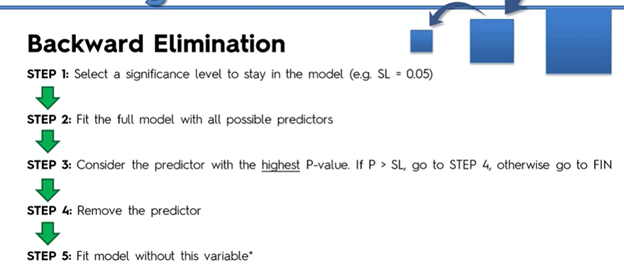

# Step 1 : Basic preprocessing and encoding


In [1]:
# import the necessary libraries 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 

In [2]:
# import the dataset 
df = pd.read_csv('50_Startups.csv') 

In [3]:
# first five entries of the dataset 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# split the dataframe into dependent and independent variables.  
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']] 
y = df['Profit'] 
x.head() 
y.head() 

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [5]:
# since the state is a string datatype column we need to encode it. 
x = pd.get_dummies(x) 
x.head() 

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


# Step 2 : Splitting the data into training and testing set and making predictions

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(x_train, y_train) 
pred = lm.predict(x_test) 

# Step 3 : Using the backward elimination technique

In [7]:
import statsmodels.regression.linear_model as sm 
# add a column of ones as integer data type 
x = np.append(arr = np.ones((50, 1)).astype(int),  
              values = x, axis = 1) 
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, [0, 1, 2, 3, 4, 5]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        12:13:41   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# remove the 4th column as it has the highest value 
x_opt = x[:, [0, 1, 2, 3, 5]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           8.49e-29
Time:                        12:15:53   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# remove the 5th column as it has the highest value 
x_opt = x[:, [0, 1, 2, 3]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           4.53e-30
Time:                        12:16:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# remove the 3rd column as it has the highest value 
x_opt = x[:, [0, 1, 2]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 
  
# remove the 2nd column as it has the highest value 
x_opt = x[:, [0, 1]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           3.50e-32
Time:                        12:20:54   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

•	**R square** – It tells about the goodness of the fit. It ranges between 0 and 1. The closer the value to 1, the better it is. It explains the extent of variation of the dependent variables in the model. However, it is biased in a way that it never decreases(even on adding variables).

•	**Adj Rsquare** – This parameter has a penalising factor(the no. of regressors) and it always decreases or stays identical to the previous value as the number of independent variables increases. If its value keeps increasing on removing the unnecessary parameters go ahead with the model or stop and revert.

•	**F statistic** – It is used to compare two variances and is always greater than 0. It is formulated as v12/v22. In regression, it is the ratio of the explained to the unexplained variance of the model.

•	**AIC and BIC** – AIC stands for Akaike’s information criterion and BIC stands for Bayesian information criterion Both these parameters depend on the likelihood function L.

•	**Skew** – Informs about the data symmetry about the mean.

•	**Kurtosis** – It measures the shape of the distribution i.e.the amount of data close to the mean than far away from the mean.

•	**Omnibus** – D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis.

•	**Log-likelihood** – It is the log of the likelihood function.


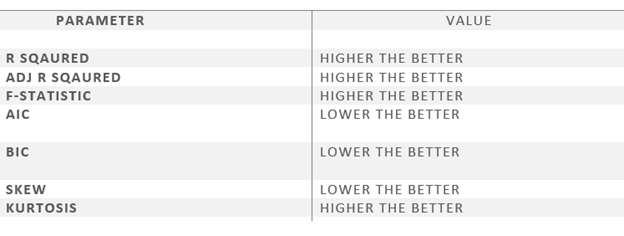